In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as ans
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [2]:
os.chdir('F:\knp big area')
os.getcwd()

'F:\\knp big area'

In [3]:
df = pd.read_csv('LE.csv')
df

Unnamed: 0        date  doy  month  year        LE  LE(w/m^2)       LE_f  \
0             0  2016-01-01    1      1  2016  4.280934  49.547846  26.687340   
1             1  2016-01-09    9      1  2016  3.983942  46.110440  21.407801   
2             2  2016-01-17   17      1  2016  4.184614  48.433035  22.367472   
3             3  2016-01-25   25      1  2016  4.097034  47.419369  29.080107   
4             4  2016-02-02   33      2  2016  4.216757  48.805061  29.018260   
..          ...         ...  ...    ...   ...       ...        ...        ...   
126         133  2018-11-25  329     11  2018  5.500724  63.665785  42.409859   
127         134  2018-12-03  337     12  2018  4.852996  56.168939  38.483083   
128         135  2018-12-11  345     12  2018  4.400318  50.929603  31.551020   
129         136  2018-12-19  353     12  2018  4.686077  54.236998  33.448103   
130         137  2018-12-27  361     12  2018  4.289179  49.643274  34.669277   

        sta_LE  
0    49.649160  
1    45.187856  
2    47.331518  
3    46.251262  
4    49.860042  
..         ...  
126  61.936497  
127  54.382695  
128  49.007732  
129  53.322883  
130  47.794335  

[131 rows x 9 columns]

In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       131 non-null    datetime64[ns]
 1   doy        131 non-null    int64         
 2   month      131 non-null    int64         
 3   year       131 non-null    int64         
 4   LE         131 non-null    float64       
 5   LE(w/m^2)  131 non-null    float64       
 6   LE_f       131 non-null    float64       
 7   sta_LE     131 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 8.3 KB


In [5]:
from numpy import cov
from scipy.stats import pearsonr
print('corr:', cov(df['LE(w/m^2)'].values,df['LE_f'].values))
print('pearson:', pearsonr(df['LE(w/m^2)'].values,df['LE_f'].values)[0])

corr: [[671.66948702 405.85579001]
 [405.85579001 756.49535241]]
pearson: 0.5693650492663946


In [8]:
import statsmodels.api as sm
x = df['LE(w/m^2)']
y = df['LE_f']
# Assuming you have x and y as arrays or lists

# Add a constant term to the independent variable x
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x)
results = model.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   LE_f   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     61.88
Date:                Sun, 14 May 2023   Prob (F-statistic):           1.28e-12
Time:                        11:23:17   Log-Likelihood:                -593.89
No. Observations:                 131   AIC:                             1192.
Df Residuals:                     129   BIC:                             1198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2560      6.742      2.263      0.0

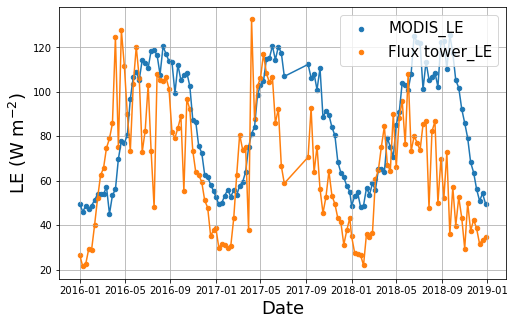

In [6]:
plt.figure(figsize = (8,5))
plt.scatter(df.date, df['LE(w/m^2)'], label = 'MODIS_LE', s = 20)
plt.plot(df.date, df['LE(w/m^2)'])
plt.scatter(df.date, df['LE_f'], label = 'Flux tower_LE', s = 20)
plt.plot(df.date, df['LE_f'])
plt.legend(loc = 'upper right', fontsize = 15)
plt.grid(True)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('LE (W m$^{-2})$', fontsize = 18)
#plt.title('MODIS LE and Flux tower LE')
plt.savefig('F:\\graph\\New folder\\FTandMODIS LE', dpi = 300)
plt.show()

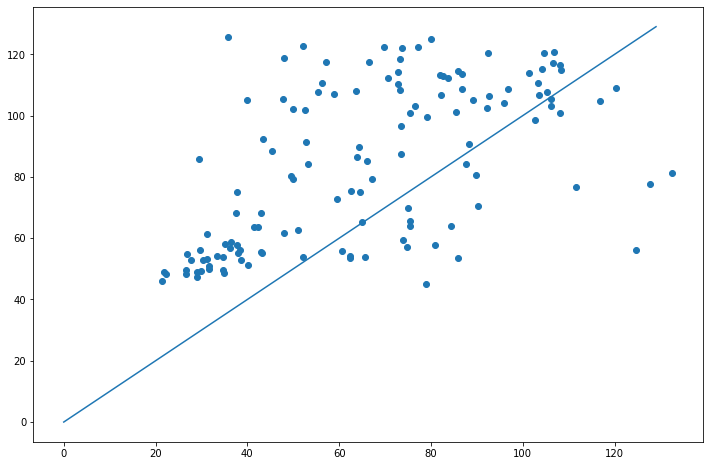

In [7]:
plt.figure(figsize = (12,8))
plt.scatter(df['LE_f'], df['LE(w/m^2)'])
plt.plot(np.arange(130),np.arange(130))
plt.show()

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['doy'] = pd.to_datetime(df['date']).dt.day_of_year

In [10]:
px.scatter(x = df.month, y = df['LE(w/m^2)'])

In [11]:
winter_LE = df[df['month'].isin([12,1,2])]
premonsoon_LE = df[df['month'].isin([3,4,5])]
monsoon_LE = df[df['month'].isin([6,7,8,9])]
postmonsoon_LE = df[df['month'].isin([10,11])]


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=winter_LE['LE(w/m^2)'],
    y=winter_LE.LE_f,
    mode = 'markers',
    name="(LE,LE_f) OF WINTER SEASON"
))
fig.add_trace(go.Scatter(
    x=premonsoon_LE['LE(w/m^2)'],
    y=premonsoon_LE.LE_f,
    mode = 'markers',
    name="(LE,LE_f) OF PREMONSOON SEASON"
))
fig.add_trace(go.Scatter(
    x=monsoon_LE['LE(w/m^2)'],
    y=monsoon_LE.LE_f,
    mode = 'markers',
    name="(LE,LE_f) OF MONSOON SEASON"
))
fig.add_trace(go.Scatter(
    x=postmonsoon_LE['LE(w/m^2)'],
    y=postmonsoon_LE.LE_f,
    mode = 'markers',
    name="(LE,LE_f) OF POSTMONSOON SEASON"
))
fig.update_layout(title='MODI LE VS GROUND MEASURE le',
    xaxis_title="$\\text{MODI_LE W}m^-2$",
    yaxis_title="$\\text{LE W }m^-2$")
fig.show()



In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df.LE_f, df['LE(w/m^2)'], squared = False)

30.556816542124785

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['LE(w/m^2)'],y = df['LE_f'], mode = 'markers'))
fig.update_layout(title='(MODI LE, Flux tower LE)',
    xaxis_title="$\\text{MODI_LE W}m^{-2}$",
    yaxis_title="$\\text{f_LE W }m^{-2}$")
fig.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_regression

# On whole data

In [15]:
x = df['LE(w/m^2)'].values
y = df['LE_f'].values
print('error in data:',mean_squared_error(y,x, squared = False))
pvalue = np.round(f_regression(x.reshape(-1,1),y)[1],6)
print(f"P value of MODIS_LE and flux tower LE:{pvalue}")


x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1),y,random_state=42, test_size = 0.2)
degree = 1

poly = PolynomialFeatures(degree= degree, include_bias=False)

model = make_pipeline(poly, LinearRegression())
model.fit(x_train.reshape(-1,1), y_train)

scores = cross_val_score(model, poly.fit_transform(np.array(x).reshape(-1,1)), y, cv=3)
print('\n cross val scores = {}\n mean_score ={}, with std = {}'.format(scores,scores.mean(), scores.std()))
print('r2 score on test = {}, on train = {}, on whole dataset = {}'.format(r2_score(y_test, model.predict(x_test)),
                                                                          r2_score(y_train, model.predict(x_train)),
                                                                          r2_score(y, model.predict(x.reshape(-1,1)))))
print('mean_squared_error on test = {}, on train = {}, on whole dataset = {}'.format(mean_squared_error(y_test, model.predict(x_test), squared = False),
                                                                          mean_squared_error(y_train, model.predict(x_train), squared = False),
                                                                          mean_squared_error(y, model.predict(x.reshape(-1,1)), squared = False)))

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,mode = 'markers', name = '(MODI_LE,Ground_measured_LE)'))
fig.add_trace(go.Scatter(x = x, y = model.predict(x.reshape(-1,1)), mode='markers+lines',name = 'predicted_LE'))
fig.update_layout(title=f'prediction of LE by polynomial regression of order {degree}',
    xaxis_title="$\\text{MODI_LE W}m^-2$",
    yaxis_title="$\\text{LE W }m^-2$")
fig.show()

error in data: 30.556816542124785
P value of MODIS_LE and flux tower LE:[0.]

 cross val scores = [ 0.03340909  0.41304427 -0.204479  ]
 mean_score =0.08065811813740505, with std = 0.2543070304878662
r2 score on test = 0.2806793964245178, on train = 0.32245616852761627, on whole dataset = 0.3215268242943451
mean_squared_error on test = 20.470686859433503, on train = 23.082150735209716, on whole dataset = 22.568645841393174


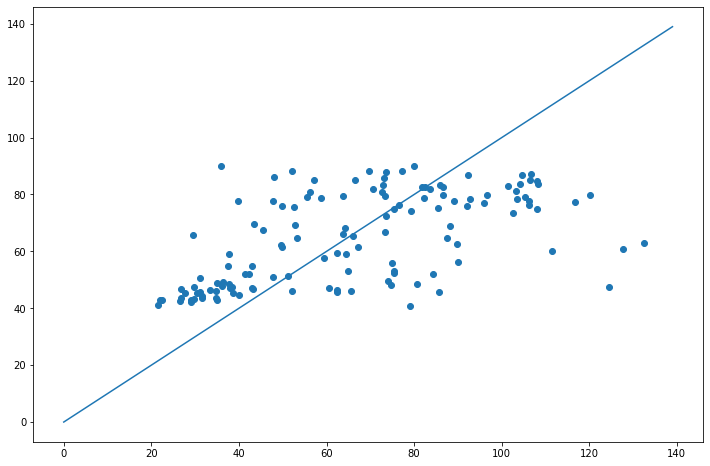

In [17]:
plt.figure(figsize = (12,8))
plt.scatter(y, model.predict(x.reshape(-1,1)))
plt.plot(np.arange(140), np.arange(140))

# Winter model

In [16]:
x = winter_LE['LE(w/m^2)'].values
y = winter_LE['LE_f'].values
print('error in data:',mean_squared_error(y,x, squared = False))
pvalue = np.round(f_regression(x.reshape(-1,1),y)[1],6)
print(f"P value of MODIS_LE and flux tower LE:{pvalue}")


x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1),y,random_state=7, test_size = 0.2)
degree = 1

poly = PolynomialFeatures(degree= degree, include_bias=False)

winter_model = make_pipeline(poly, LinearRegression())
winter_model.fit(x_train.reshape(-1,1), y_train)

scores = cross_val_score(winter_model, poly.fit_transform(np.array(x).reshape(-1,1)), y, cv=3)
print('\n cross val scores = {}\n mean_score ={}, with std = {}'.format(scores,scores.mean(), scores.std()))
print('r2 score on test = {}, on train = {}, on whole dataset = {}'.format(r2_score(y_test, winter_model.predict(x_test)),
                                                                          r2_score(y_train, winter_model.predict(x_train)),
                                                                          r2_score(y, winter_model.predict(x.reshape(-1,1)))))
print('mean_squared_error on test = {}, on train = {}, on whole dataset = {}'
      .format(mean_squared_error(y_test, winter_model.predict(x_test), squared = False),
              mean_squared_error(y_train, winter_model.predict(x_train), squared = False),
              mean_squared_error(y, winter_model.predict(x.reshape(-1,1)), squared = False)))


fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,mode = 'markers', name = '(MODI_LE,Ground_measured_LE)'))
fig.add_trace(go.Scatter(x = x, y = winter_model.predict(x.reshape(-1,1)), mode='markers',name = 'predicted_LE'))
fig.update_layout(title=f'prediction of LE by polynomial regression of order {degree}',
    xaxis_title="$\\text{MODI_LE W}m^-2$",
    yaxis_title="$\\text{LE W }m^-2$")
fig.show()

error in data: 19.809952894253524
P value of MODIS_LE and flux tower LE:[0.002693]

 cross val scores = [ 0.20565475 -0.26663942 -0.58688126]
 mean_score =-0.21595530891678702, with std = 0.32553032970313867
r2 score on test = 0.595012151031973, on train = 0.1272868434945824, on whole dataset = 0.22360758457713226
mean_squared_error on test = 5.570152538689159, on train = 9.261804993423162, on whole dataset = 8.579824012452562


# Premonsoon model

In [17]:
x = premonsoon_LE['LE(w/m^2)'].values
y = premonsoon_LE['LE_f'].values
print('error in data:',mean_squared_error(y,x, squared = False))
pvalue = np.round(f_regression(x.reshape(-1,1),y)[1],6)
print(f"P value of MODIS_LE and flux tower LE:{pvalue}")


x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1),y,random_state=5, test_size = 0.05)
degree = 1

poly = PolynomialFeatures(degree= degree, include_bias=False)

premon_model = make_pipeline(poly, LinearRegression())
premon_model.fit(x_train.reshape(-1,1), y_train)

scores = cross_val_score(premon_model, poly.fit_transform(np.array(x).reshape(-1,1)), y, cv=3)
print('\n cross val scores = {}\n mean_score ={}, with std = {}'.format(scores,scores.mean(), scores.std()))
print('r2 score on test = {}, on train = {}, on whole dataset = {}'.format(r2_score(y_test, premon_model.predict(x_test)),
                                                                          r2_score(y_train, premon_model.predict(x_train)),
                                                                          r2_score(y, premon_model.predict(x.reshape(-1,1)))))
print('mean_squared_error on test = {}, on train = {}, on whole dataset = {}'
      .format(mean_squared_error(y_test, premon_model.predict(x_test), squared = False),
              mean_squared_error(y_train, premon_model.predict(x_train), squared = False),
              mean_squared_error(y, premon_model.predict(x.reshape(-1,1)), squared = False)))


fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,mode = 'markers', name = '(MODI_LE,Ground_measured_LE)'))
fig.add_trace(go.Scatter(x = x, y = premon_model.predict(x.reshape(-1,1)), mode='markers',name = 'predicted_LE'))
fig.update_layout(title=f'prediction of LE by polynomial regression of order {degree}',
    xaxis_title="$\\text{MODI_LE W}m^-2$",
    yaxis_title="$\\text{LE W }m^-2$")
fig.show()

error in data: 24.17453511193946
P value of MODIS_LE and flux tower LE:[0.026491]

 cross val scores = [-0.63396591  0.06097907 -1.81342225]
 mean_score =-0.7954696995005325, with std = 0.7736957550414107
r2 score on test = -35.91506579951201, on train = 0.11655535181376575, on whole dataset = 0.1475400800320198
mean_squared_error on test = 8.392769771983, on train = 20.143731767517966, on whole dataset = 19.632799537990312


In [18]:
px.scatter(premonsoon_LE, x = 'date', y = ['LE_f', premon_model.predict(x.reshape(-1,1))])

# Monsoon model

In [19]:
x = monsoon_LE['LE(w/m^2)'].values
y = monsoon_LE['LE_f'].values
print('error in data:',mean_squared_error(y,x, squared = False))
pvalue = np.round(f_regression(x.reshape(-1,1),y)[1],6)
print(f"P value of MODIS_LE and flux tower LE:{pvalue}")


x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1),y,random_state=23, test_size = 0.04)
degree = 1

poly = PolynomialFeatures(degree= degree, include_bias=False)

mon_model = make_pipeline(poly, LinearRegression())
mon_model.fit(x_train, y_train)

scores = cross_val_score(mon_model, x.reshape(-1,1), y, cv=3)
print('\n cross val scores = {}\n mean_score ={}, with std = {}'.format(scores,scores.mean(), scores.std()))
print('r2 score on test = {}, on train = {}, on whole dataset = {}'.format(r2_score(y_test, mon_model.predict(x_test)),
                                                                          r2_score(y_train, mon_model.predict(x_train)),
                                                                          r2_score(y, mon_model.predict(x.reshape(-1,1)))))
print('mean_squared_error on test = {}, on train = {}, on whole dataset = {}'
      .format(mean_squared_error(y_test, mon_model.predict(x_test), squared = False),
              mean_squared_error(y_train, mon_model.predict(x_train), squared = False),
              mean_squared_error(y, mon_model.predict(x.reshape(-1,1)), squared = False)))


fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,mode = 'markers', name = '(MODI_LE,Ground_measured_LE)'))
fig.add_trace(go.Scatter(x = x, y = mon_model.predict(x.reshape(-1,1)), mode='markers',name = 'predicted_LE'))
fig.update_layout(title=f'prediction of LE by polynomial regression of order {degree}',
    xaxis_title="$\\text{MODI_LE W}m^-2$",
    yaxis_title="$\\text{LE W }m^-2$")
fig.show()

error in data: 38.52166698531756
P value of MODIS_LE and flux tower LE:[0.311617]

 cross val scores = [-0.8141667  -0.17973473 -1.391495  ]
 mean_score =-0.7951321421616265, with std = 0.4948821260432953
r2 score on test = -0.3753204456238264, on train = 0.0258260310837074, on whole dataset = 0.026009036561413512
mean_squared_error on test = 17.541878954073926, on train = 19.377676138180213, on whole dataset = 19.292178373764187


# Postmonsoon model

In [20]:
x = postmonsoon_LE['LE(w/m^2)'].values
y = postmonsoon_LE['LE_f'].values
print('error in data:',mean_squared_error(y,x, squared = False))
pvalue = np.round(f_regression(x.reshape(-1,1),y)[1],6)
print(f"P value of MODIS_LE and flux tower LE:{pvalue}")


x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1),y,random_state=42, test_size = 0.2)
degree = 1

poly = PolynomialFeatures(degree= degree, include_bias=False)

postmon_model = make_pipeline(poly, LinearRegression())
postmon_model.fit(x_train, y_train)

scores = cross_val_score(postmon_model, x.reshape(-1,1), y, cv=3)
print('\n cross val scores = {}\n mean_score ={}, with std = {}'.format(scores,scores.mean(), scores.std()))
print('r2 score on test = {}, on train = {}, on whole dataset = {}'.format(r2_score(y_test, postmon_model.predict(x_test)),
                                                                          r2_score(y_train, postmon_model.predict(x_train)),
                                                                          r2_score(y, postmon_model.predict(x.reshape(-1,1)))))
print('mean_squared_error on test = {}, on train = {}, on whole dataset = {}'
      .format(mean_squared_error(y_test, postmon_model.predict(x_test), squared = False),
              mean_squared_error(y_train, postmon_model.predict(x_train), squared = False),
              mean_squared_error(y, postmon_model.predict(x.reshape(-1,1)), squared = False)))


fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,mode = 'markers', name = '(MODI_LE,Ground_measured_LE)'))
fig.add_trace(go.Scatter(x = x, y = postmon_model.predict(x.reshape(-1,1)), mode='markers',name = 'predicted_LE'))
fig.update_layout(title=f'prediction of LE by polynomial regression of order {degree}',
    xaxis_title="$\\text{MODI_LE W}m^-2$",
    yaxis_title="$\\text{LE W }m^-2$")
fig.show()

error in data: 36.55616725972046
P value of MODIS_LE and flux tower LE:[0.061124]

 cross val scores = [-2.27478913 -0.34211588 -6.80944027]
 mean_score =-3.1421150927557, with std = 2.7105672113451953
r2 score on test = 0.18782581048580216, on train = 0.13591610454240888, on whole dataset = 0.15977760429532717
mean_squared_error on test = 20.1107872722426, on train = 12.714998387568484, on whole dataset = 14.814660961488501


In [21]:
def predicted_LE(data):  # data df must contains columns "date, doy, month"
    pred_LE = []
    doy = []
    date = []
    for i in range(data.shape[0]):
        d = data.iloc[i,:]
        date.append(d.date)
        doy.append(d.doy)
        m = d.month
        if m in ([1,2,12]):
            pred_LE.append(winter_model.predict(np.array([[d['LE(w/m^2)']]]))[0])
        elif m in ([3,4,5]):
            pred_LE.append(premon_model.predict(np.array([[d['LE(w/m^2)']]]))[0])
        elif m in ([6,7,8,9]):
            pred_LE.append(mon_model.predict(np.array([[d['LE(w/m^2)']]]))[0])
        elif m in ([10,11]):
            pred_LE.append(postmon_model.predict(np.array([[d['LE(w/m^2)']]]))[0])
        else:
            print('month is not in month')
    pred_df = pd.DataFrame({'date':date, 'DoY':doy, 'pred_LE':pred_LE})
    p_LE = []
    for i in pred_df['pred_LE']:
        if i<20:
            p_LE.append(20)
        elif i>120:
            p_LE.append(120)
        else:
            p_LE.append(i)
    pred_df['pred_LE'] = np.array(p_LE)
    
    return pred_df
        

In [22]:
p_df= predicted_LE(df)
p_df['LE_f'] = df.LE_f
p_df

date  DoY    pred_LE       LE_f
0   2016-01-01    1  32.648070  26.687340
1   2016-01-09    9  29.765104  21.407801
2   2016-01-17   17  31.713073  22.367472
3   2016-01-25   25  30.862908  29.080107
4   2016-02-02   33  32.025094  29.018260
..         ...  ...        ...        ...
126 2018-11-25  329  47.149395  42.409859
127 2018-12-03  337  38.201209  38.483083
128 2018-12-11  345  33.806955  31.551020
129 2018-12-19  353  36.580882  33.448103
130 2018-12-27  361  32.728106  34.669277

[131 rows x 4 columns]

In [23]:
print('r2 score:',r2_score(df.LE_f, p_df.pred_LE))
print('root mean squared error',mean_squared_error(df.LE_f, p_df.pred_LE, squared = False))
print('coverience:',cov(df.LE_f, p_df.pred_LE))
print('Pearson corelation coeficent:',pearsonr(df.LE_f, p_df.pred_LE))

r2 score: 0.6416826993957028
root mean squared error 16.40110274574122
coverience: [[756.49535241 473.7140126 ]
 [473.7140126  461.99617396]]
Pearson corelation coeficent: (0.8012977252947734, 1.4438710804193733e-30)


In [24]:
df

date  doy  month  year        LE  LE(w/m^2)       LE_f     sta_LE
0   2016-01-01    1      1  2016  4.280934  49.547846  26.687340  49.649160
1   2016-01-09    9      1  2016  3.983942  46.110440  21.407801  45.187856
2   2016-01-17   17      1  2016  4.184614  48.433035  22.367472  47.331518
3   2016-01-25   25      1  2016  4.097034  47.419369  29.080107  46.251262
4   2016-02-02   33      2  2016  4.216757  48.805061  29.018260  49.860042
..         ...  ...    ...   ...       ...        ...        ...        ...
126 2018-11-25  329     11  2018  5.500724  63.665785  42.409859  61.936497
127 2018-12-03  337     12  2018  4.852996  56.168939  38.483083  54.382695
128 2018-12-11  345     12  2018  4.400318  50.929603  31.551020  49.007732
129 2018-12-19  353     12  2018  4.686077  54.236998  33.448103  53.322883
130 2018-12-27  361     12  2018  4.289179  49.643274  34.669277  47.794335

[131 rows x 8 columns]

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['LE(w/m^2)'], y = df['LE_f'], mode = 'markers'))
fig.add_trace(go.Scatter(x = df['LE(w/m^2)'], y = p_df['pred_LE'], mode = 'markers'))

In [26]:
winter_LE = df[df['month'].isin([12,1,2])]
premonsoon_LE = df[df['month'].isin([3,4,5])]
monsoon_LE = df[df['month'].isin([6,7,8,9])]
postmonsoon_LE = df[df['month'].isin([10,11])]


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=winter_LE['LE(w/m^2)'],
    y=winter_LE.LE_f,
    mode = 'markers',
    name="(LE,LE_f) OF WINTER SEASON"
))
fig.add_trace(go.Scatter(
    x=premonsoon_LE['LE(w/m^2)'],
    y=premonsoon_LE.LE_f,
    mode = 'markers',
    name="(LE,LE_f) OF PREMONSOON SEASON"
))
fig.add_trace(go.Scatter(
    x=monsoon_LE['LE(w/m^2)'],
    y=monsoon_LE.LE_f,
    mode = 'markers',
    name="(LE,LE_f) OF MONSOON SEASON"
))
fig.add_trace(go.Scatter(
    x=postmonsoon_LE['LE(w/m^2)'],
    y=postmonsoon_LE.LE_f,
    mode = 'markers',
    name="(LE,LE_f) OF POSTMONSOON SEASON"
))
fig.add_trace(go.Scatter(
    x=df['LE(w/m^2)'],
    y=p_df['pred_LE'],
    mode = 'markers',
    name="(LE,LE_f) OF POSTMONSOON SEASON"
))
fig.update_layout(title='MODI LE VS GROUND MEASURE le',
    xaxis_title="$\\text{MODI_LE W}m^-2$",
    yaxis_title="$\\text{LE W }m^-2$")
fig.show()



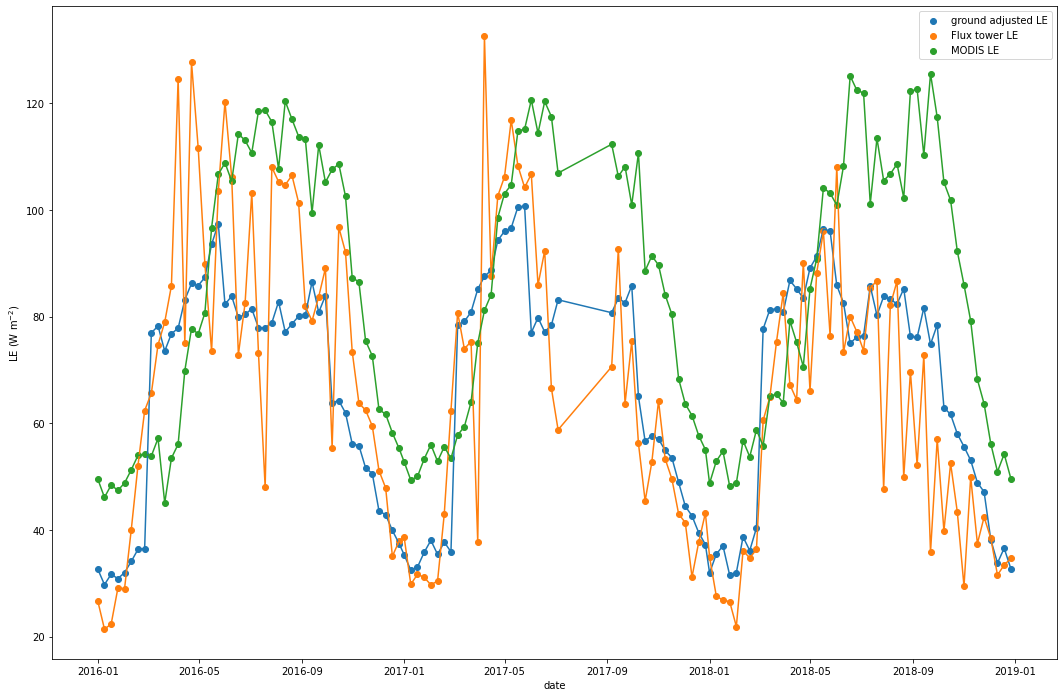

In [28]:
plt.figure(figsize = (18,12))
plt.scatter(p_df.date, p_df.pred_LE, label = 'ground adjusted LE')
plt.plot(p_df.date, p_df.pred_LE)
plt.scatter(p_df.date, p_df.LE_f, label = 'Flux tower LE')
plt.plot(p_df.date, p_df.LE_f)
plt.scatter(p_df.date, df['LE(w/m^2)'], label = 'MODIS LE')
plt.plot(p_df.date, df['LE(w/m^2)'])
plt.xlabel('date')
plt.ylabel('LE (W m$^{-2}$)')
plt.legend()
plt.show()

In [34]:
print(f"RMSE between FT LE and PRED LE:{mean_squared_error(p_df.pred_LE,p_df.LE_f, squared = False)}")
print(f"RMSE between MODIS LE and FT LE:{mean_squared_error({df['LE(w/m^2)'],p_df.LE_f, squared = False)}")"")

SyntaxError: f-string: closing parenthesis ')' does not match opening parenthesis '{' (851301843.py, line 2)

In [30]:
MODIS_LE = pd.read_csv('MODIS_LE.csv')
MODIS_LE['month'] = pd.to_datetime(MODIS_LE['date']).dt.month
MODIS_LE['doy'] = pd.to_datetime(MODIS_LE['date']).dt.day_of_year
MODIS_LE

Unnamed: 0        date        LE  LE(w/m^2)  month  doy
0              0  2000-01-01  3.056256  35.373339      1    1
1              1  2000-01-09  3.385569  39.184825      1    9
2              2  2000-01-17  3.541777  40.992794      1   17
3              3  2000-01-25  3.589613  41.546452      1   25
4              4  2000-02-02  3.775802  43.701416      2   33
...          ...         ...       ...        ...    ...  ...
1007        1007  2021-11-25  5.718218  66.183077     11  329
1008        1008  2021-12-03  5.343989  61.851729     12  337
1009        1009  2021-12-11  4.746983  54.941933     12  345
1010        1010  2021-12-19  4.549563  52.656973     12  353
1011        1011  2021-12-27  4.358848  50.449625     12  361

[1012 rows x 6 columns]

In [46]:
season_mod_pred = predicted_LE(MODIS_LE)
season_mod_pred

date  DoY    pred_LE
0     2000-01-01    1  20.759853
1     2000-01-09    9  23.956562
2     2000-01-17   17  25.472913
3     2000-01-25   25  25.937268
4     2000-02-02   33  27.744646
...          ...  ...        ...
1007  2021-11-25  329  48.107361
1008  2021-12-03  337  42.967388
1009  2021-12-11  345  37.172114
1010  2021-12-19  353  35.255708
1011  2021-12-27  361  33.404396

[1012 rows x 3 columns]

In [47]:
season_mod_pred.to_csv('season_mol_pred_LE.csv')

In [48]:
px.scatter(season_mod_pred, x = 'date', y = 'pred_LE')

In [49]:
#px.scatter(season_mod_pred, x = 'date', y = ['pred_LE', MODIS_LE['LE(w/m^2)'], p_df['LE_f']])
fig = go.Figure()
fig.add_trace(go.Scatter(x = season_mod_pred['date'], y = season_mod_pred['pred_LE'],
                         mode = 'markers+lines', name = 'predicted LE', marker_size = 5))
fig.add_trace(go.Scatter(x = season_mod_pred['date'], y = MODIS_LE['LE(w/m^2)'],
                         name = 'MODIS_LE', mode = 'markers+lines', marker_size = 5))
fig.add_trace(go.Scatter(x = p_df['date'], y = p_df['LE_f'],
                         name = 'Flux tower LE', mode = 'markers+lines', marker_size = 5))
fig.show()


In [50]:
px.scatter(season_mod_pred, x = 'date', y = 'pred_LE')

In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['doy'], y = season_mod_pred['pred_LE'],
                         mode = 'markers', name = 'predicted LE', marker_size = 5))
fig.add_trace(go.Scatter(x = df['doy'], y = p_df['LE_f'],
                         name = 'Flux tower LE', mode = 'markers', marker_size = 5))
fig.add_trace(go.Scatter(x = df['doy'], y = MODIS_LE['LE(w/m^2)'],
                         name = 'MODIS_LE', mode = 'markers', marker_size = 5))
fig.show()


df

x = df[['doy','month','LE(w/m^2)','LE_f']]
def seasons(month):
    if month in [1,2,12]:
        return 'winter'
    elif month in [3,4,5]:
        return 'premonsoon'
    elif month in [6,7,8,9]:
        return 'monsoon'
    elif month in [10,11]:
        return 'postmonsoon'
    else:
        print('Input month is not correct')
x['seasons'] = list(map(seasons,x.month))
x

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(dtype = 'int')
s_df = pd.DataFrame(enc.fit_transform(x[['seasons']]).toarray(),columns = enc.categories_)
df = pd.concat([x,s_df], axis = 1)
df.rename(columns = {'(monsoon,)':'monsoon','(postmonsoon,)':'postmonsoon',
                     '(premonsoon,)':'premonsoon','(winter,)':'winter'}, inplace = True)
#df.corr()

X = df.iloc[:,[5,6,7,8,2]]
y = df[['LE_f']]
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size = 0.25)
for i in [x_train, x_test, y_train, y_test]:
    print(f'shape:{i.shape}')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model
scale = MinMaxScaler()
x_train, x_test = scale.fit_transform(x_train), scale.fit_transform(x_test)
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)
pred = lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, pred)))
plt.scatter(lasso.predict(x_test), y_test)
plt.plot(np.arange(120), np.arange(120))
plt.show()

from sklearn import svm
svm_reg = svm.SVR(kernel = 'rbf', gamma = 'scale', C = 8, epsilon = 6,verbose = True)
svm_reg.fit(x_train,y_train)
pred = svm_reg.predict(x_test)
print(mean_squared_error(y_test, pred, squared = False))
plt.plot(np.arange(120), np.arange(120))
plt.scatter(y_test, pred)
plt.show()

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 8, criterion='squared_error', max_depth = 4, random_state = 42)
rf_reg.fit(x_train, y_train)
pred = rf_reg.predict(x_test)
print(mean_squared_error(y_test, pred, squared = False))
plt.plot(np.arange(120), np.arange(120))
plt.scatter(y_test, pred)
plt.show()

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
adaboost_reg = AdaBoostRegressor(n_estimators = 10,learning_rate = 2,
                                 loss = 'linear', random_state = 12)
adaboost_reg.fit(x_train, y_train)
pred = adaboost_reg.predict(x_test)
print(mean_squared_error(y_test,pred,squared = False))
plt.plot(np.arange(120), np.arange(120))
plt.scatter(y_test, pred)
plt.show()

from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators = 25, random_state = 23,learning_rate = 0.1, loss = 'huber')
gb_reg.fit(x_train, y_train)
pred = gb_reg.predict(x_test)
print(mean_squared_error(y_test,pred,squared = False))
plt.plot(np.arange(120), np.arange(120))
plt.scatter(y_test, pred)
plt.show()

large_LE = df[df['LE_f']>80]
px.scatter(large_LE, x = 'LE(w/m^2)', y = 'LE_f')

#X_ = scale.fit_transform(X)
plt.figure(figsize = (12,8))
plt.plot(np.arange(len(y)), rf_reg.predict(X_))
plt.plot(np.arange(len(y)), y.values)
plt.show()

px.line(x = p_df['date'], y = [y.values[:,0],p_df['pred_LE'],lasso.predict(X_),svm_reg.predict(X_),
                               rf_reg.predict(X_),adaboost_reg.predict(X_), gb_reg.predict(X_)])

# Avarage LE on DoY

In [35]:
LE_mean,LE_std,LE_f_mean,LE_f_std,DoY= [],[],[],[],[]
for doy in df.doy.unique():
    d = df[df['doy'] == doy]
    LE_mean.append(d['LE(w/m^2)'].mean())
    LE_std.append(d['LE(w/m^2)'].std())
    LE_f_mean.append(d['LE_f'].mean())
    LE_f_std.append(d['LE_f'].std())
    DoY.append(d['doy'].iloc[0])

In [36]:
doy_LE = pd.DataFrame({'doy':DoY,'LE_mean':LE_mean,'LE_std':LE_std,'LE_f_mean':LE_f_mean,'LE_f_std':LE_f_std})

In [37]:
doy_LE

doy     LE_mean     LE_std   LE_f_mean   LE_f_std
0     1   50.363092   2.148948   33.442019   6.145003
1     9   49.447632   3.390585   26.288259   4.366508
2    17   51.080114   3.300502   26.959203   4.655982
3    25   49.655408   3.196198   28.927696   2.278639
4    33   51.197316   4.152749   26.877910   4.327514
5    41   53.632940   2.823827   35.532977   4.829264
6    49   54.431994   1.017230   43.257550   8.649038
7    57   55.451928   2.897279   53.710198  15.029901
8    65   55.813068   1.959957   68.996468  10.505829
9    73   60.549132   4.105330   71.189215   5.476964
10   81   58.149137  11.359000   76.544096   2.110078
11   89   64.101453  10.774493   69.317918  27.359896
12   97   72.146520  13.954782  108.129239  35.652580
13  105   76.395362   7.212236   75.687972  11.600889
14  113   82.320106  14.527860  106.808984  19.101781
15  121   88.362812  13.433702   94.639887  24.855124
16  129   92.086652  12.038153   98.294949  16.085019
17  137  105.201422   9.121943   92.584091  17.627360
18  145  108.325261   6.147327   94.707041  15.821119
19  153  110.111292   9.938365  111.684599   7.457308
20  161  109.325438   4.603724   88.450603  16.574336
21  169  119.910192   5.447521   81.742826   9.847220
22  177  117.658215   4.695053   75.406625   8.105906
23  185  113.183562   7.811568   78.534100  22.609447
24  193  109.859401  12.282396   79.303576   8.640629
25  201  116.063108   3.728786   67.341253  27.390477
26  209  111.005693   7.782400   77.849571  42.658142
27  217  107.230892   0.687829   93.724003  16.359205
28  225  114.506527   8.313560   95.685964  12.749325
29  233  109.642297  10.423001   78.190310  40.008803
30  241  118.010574   6.002601   85.502474  22.412923
31  249  116.080024   5.697111   68.230083  15.013196
32  257  105.337582   5.467193   81.566019  10.181820
33  265  115.275350   9.097740   61.084913  24.063171
34  273  107.828780   8.518694   73.836929  16.064937
35  281  107.811737   2.739207   50.514544   9.267864
36  289   99.666908  10.185845   64.892838  27.815796
37  297   95.394543   6.201076   62.723218  25.850837
38  305   87.655372   1.874555   55.703325  23.202525
39  313   83.240922   3.716221   55.676559   7.228247
40  321   74.690168   6.128808   49.818946  12.510489
41  329   68.224812   4.493757   48.309157   9.690212
42  337   60.798506   4.043126   43.656196   6.620733
43  345   58.028713   6.149194   36.869701   9.530830
44  353   56.718323   2.163627   35.410091   2.149383
45  361   53.332058   3.196501   38.588781   4.301497

In [38]:
px.scatter(df, x = 'doy', y = ['LE(w/m^2)','LE_f'], text='month')

In [39]:
df

date  doy  month  year        LE  LE(w/m^2)       LE_f     sta_LE
0   2016-01-01    1      1  2016  4.280934  49.547846  26.687340  49.649160
1   2016-01-09    9      1  2016  3.983942  46.110440  21.407801  45.187856
2   2016-01-17   17      1  2016  4.184614  48.433035  22.367472  47.331518
3   2016-01-25   25      1  2016  4.097034  47.419369  29.080107  46.251262
4   2016-02-02   33      2  2016  4.216757  48.805061  29.018260  49.860042
..         ...  ...    ...   ...       ...        ...        ...        ...
126 2018-11-25  329     11  2018  5.500724  63.665785  42.409859  61.936497
127 2018-12-03  337     12  2018  4.852996  56.168939  38.483083  54.382695
128 2018-12-11  345     12  2018  4.400318  50.929603  31.551020  49.007732
129 2018-12-19  353     12  2018  4.686077  54.236998  33.448103  53.322883
130 2018-12-27  361     12  2018  4.289179  49.643274  34.669277  47.794335

[131 rows x 8 columns]

In [40]:
x = df.drop(['date','year','LE','LE_f','sta_LE'], axis = 1)
y = df['LE_f']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=7)
x_train.shape, x_test.shape
x

doy  month  LE(w/m^2)
0      1      1  49.547846
1      9      1  46.110440
2     17      1  48.433035
3     25      1  47.419369
4     33      2  48.805061
..   ...    ...        ...
126  329     11  63.665785
127  337     12  56.168939
128  345     12  50.929603
129  353     12  54.236998
130  361     12  49.643274

[131 rows x 3 columns]

In [41]:
px.scatter(x_train, x = 'doy', y = ['LE(w/m^2)', y_train])

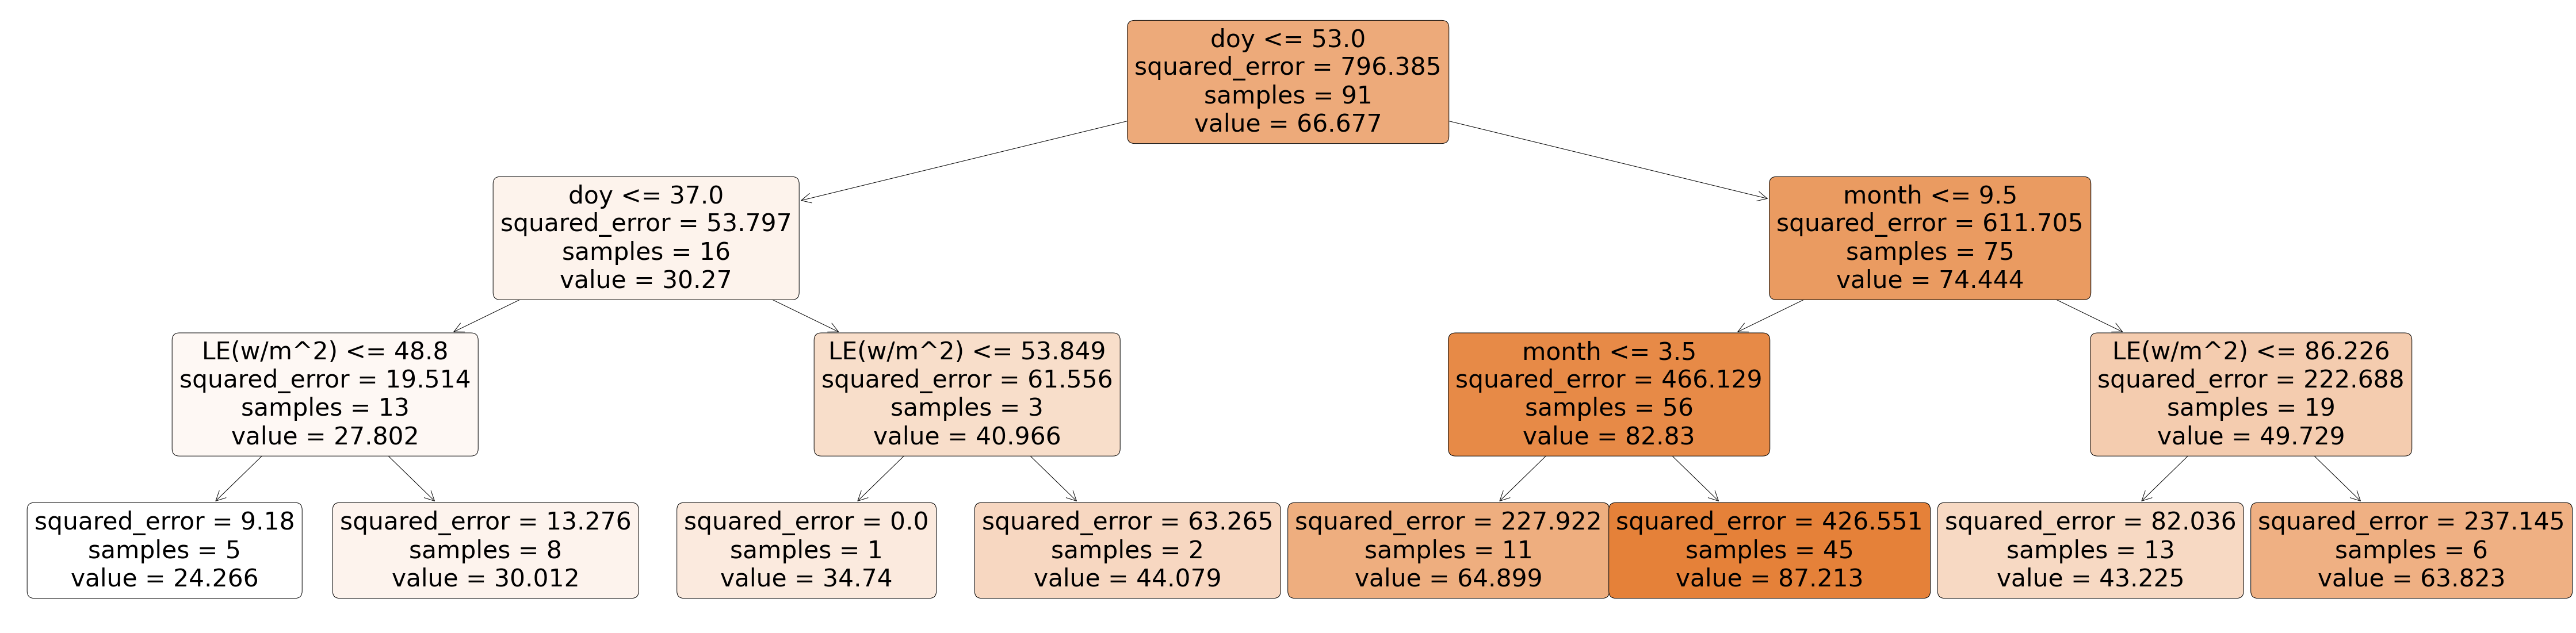

In [42]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42, max_depth= 3)
tree.fit(x_train, y_train)
plt.figure(figsize=(80,20))
plot_tree(tree, feature_names=x_train.columns, filled=True, rounded=True);

In [43]:
prediction = tree.predict(x_test)
print('r2_score=',r2_score(y_test,prediction))
print('rmse=', mean_squared_error(y_test,prediction, squared = False))

r2_score= 0.5330203375503428
rmse= 17.326245700636512


15.803969458626918
r2_score =  0.6114728317021864


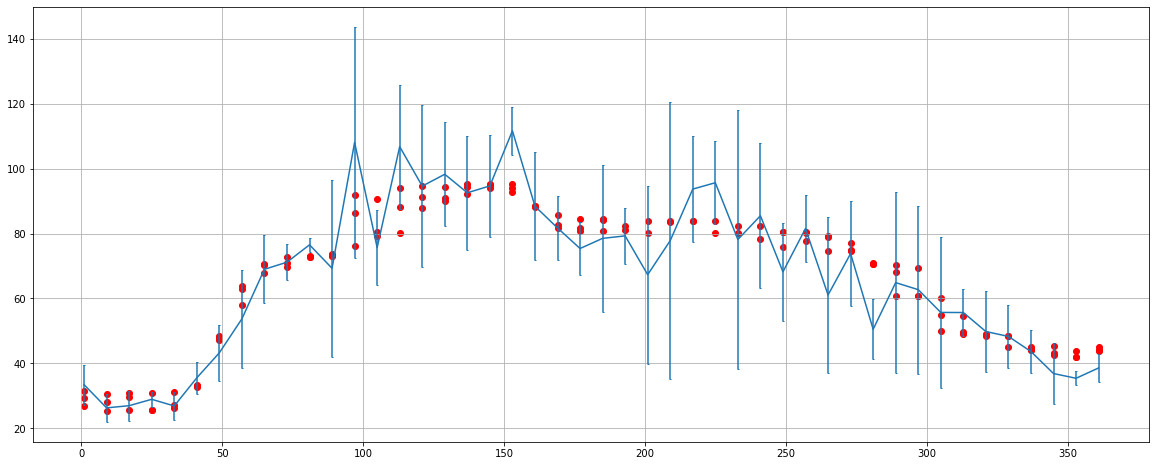

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, max_depth = 3, random_state = 0)
rf.fit(x_train, y_train)
prediction = rf.predict(x_test)

rmse = mean_squared_error(y_test, prediction, squared = False)
print(rmse)
print('r2_score = ', r2_score(y_test,prediction))

fig = go.Figure()
fig.add_trace(go.Scatter(x = x_train['LE(w/m^2)'], y = y_train,mode = 'markers', name = '(MODI_LE,flux tower_LE)'))
fig.add_trace(go.Scatter(x = x_train['LE(w/m^2)'], y = rf.predict(x_train), mode = 'markers', name = 'Predicted LE'))
fig.update_layout(title='prediction of LE by RandomForrest',
    xaxis_title="$\\text{MODI_LE (W}m^{-2})$",
    yaxis_title="$\\text{LE (W}m^{-2})$")
fig.show()

plt.figure(figsize = (20,8))
plt.errorbar(doy_LE.doy,doy_LE.LE_f_mean,yerr = doy_LE.LE_f_std,capsize = 1)
plt.scatter(df.doy, y = rf.predict(x),color = 'r')
plt.grid(True)


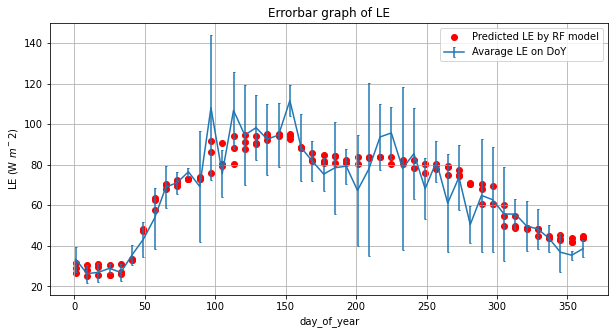

In [49]:
plt.figure(figsize = (10,5))
plt.errorbar(doy_LE.doy,doy_LE.LE_f_mean,yerr = doy_LE.LE_f_std,capsize = 1, label = 'Avarage LE on DoY')
plt.scatter(df.doy, y = rf.predict(x),color = 'r', label = 'Predicted LE by RF model')
plt.xlabel('day_of_year')
plt.ylabel('LE (W $m^-2$)')
plt.title('Errorbar graph of LE')
plt.legend()
plt.savefig('F:\graph\Errorbar_RF.png', dpi=300)
plt.grid(True)

In [50]:
fig = go.Figure([
    go.Scatter(
        name='flux tower LE mean',
        x=doy_LE['doy'],
        y=doy_LE['LE_f_mean'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=doy_LE['doy'],
        y=doy_LE['LE_f_mean'] + doy_LE['LE_f_std'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=doy_LE['doy'],
        y=doy_LE['LE_f_mean'] - doy_LE['LE_f_std'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    ),
    go.Scatter(
        x = df.doy,
        y = rf.predict(x),mode = 'markers', name = 'predicted LE'),
    #go.Scatter(x = df.DoY, y = df.LE_f, mode = 'markers', name = 'flux tower LE')
])
fig.update_layout(title = 'prediced LE fitted in flux tower_LE',
                 xaxis_title = 'DoY',
                 yaxis_title = '$\\text{LE (W}m^-2)$')
fig.show()

In [51]:
importance = rf.feature_importances_
importance

array([0.44997975, 0.17692042, 0.37309983])

In [52]:
import seaborn as sns
def plot_importance(features, importance, model_name):
    importance_df = pd.DataFrame({
                              'features': features,
                              'importance': importance
                              }).sort_values(by = 'importance', ascending= False)
    plt.figure(figsize=(10,6))
    plt.title(model_name + ' Feature Importance')
    sns.barplot(data=importance_df.head(10), x='importance', y='features')
    sns.despine();

    return

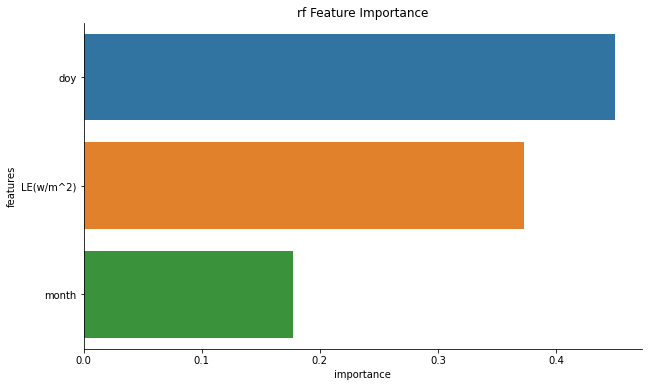

In [53]:
plot_importance(x_train.columns,rf.feature_importances_,'rf' )

In [54]:
%%time
from sklearn.model_selection import GridSearchCV
grid = { 
    'n_estimators': [300,400,500,600,700,800],
     #'max_features':['sqrt'],
    'max_depth' : [2,3,4,5,6,7],
    'random_state' : [0,16,42]
}
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(x_train, y_train)
#'max_features': ['sqrt','log2']

CPU times: total: 8min 59s
Wall time: 9min 13s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [300, 400, 500, 600, 700, 800],
                         'random_state': [0, 16, 42]})

In [55]:
CV_rfr.best_score_

0.5319865042736597

In [121]:
rf_best = CV_rfr.best_estimator_
rf_best

RandomForestRegressor(max_depth=3, n_estimators=500, random_state=42)

In [355]:
rf = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=42)
rf.fit(x_train, y_train)
prediction = rf.predict(x_test)
mse = mean_squared_error(y_test, prediction)
print('rmse=', np.sqrt(mse))
print('r2_scor = ', r2_score(y_test,prediction))

rmse= 15.981589686082165
r2_scor =  0.6026904702580732


In [356]:
#mse = mean_squared_error(y_test, prediction)
print("r2_score in x_train", r2_score(y_train,rf.predict(x_train)))
print('rmse on y_train:',mean_squared_error(y_train,rf.predict(x_train),squared = False))

print("r2_score in x_test", r2_score(y_test,rf.predict(x_test)))
print('rmse on y_test:',mean_squared_error(y_test,rf.predict(x_test),squared = False))

print('r2 score in entire data set',r2_score(y,rf.predict(x)))
print('rmse on entire data set:',mean_squared_error(y,rf.predict(x),squared = False))

r2_score in x_train 0.7228876954107212
rmse on y_train: 14.855577264772876
r2_score in x_test 0.6026904702580732
rmse on y_test: 15.981589686082165
r2 score in entire data set 0.6919085006370563
rmse on entire data set: 15.208242130555105


In [357]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = x_train['LE(w/m^2)'], y = y_train,mode = 'markers', name = '(MODI_LE, flux towerr_LE)'))
fig.add_trace(go.Scatter(x = x_train['LE(w/m^2)'], y = rf.predict(x_train), mode = 'markers', name = 'Predicted LE' ))
fig.update_layout(title = 'Prected LE by randomforest model',
                 xaxis_title = '$\\text{MODI_LE (W}m^{-2})$',
                 yaxis_title = '$\\text{Flux_tower_LE (W}m^{-2})$')
fig.show()

In [358]:
px.scatter(x = rf.predict(x), y = df.LE_f)

In [359]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.date, y = df.LE_f, mode = 'markers', name = 'Flux tower_LE'))
fig.add_trace(go.Scatter(x = df.date, y = rf.predict(x), mode = 'markers', name = 'Predicted LE'))
fig.update_layout(title = 'Predicted LE vs Flux tower LE on Date',
                 xaxis_title = 'Date',
                 yaxis_title = '$\\text{LE (W}m^{-2})$')
fig.show()

In [360]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.doy, y = df.LE_f, mode = 'markers', name = 'Flux tower LE'))
fig.add_trace(go.Scatter(x = df.doy, y = rf.predict(x), mode = 'markers', name = 'Predicted LE'))
#fig.add_trace(go.Scatter(x = df.DoY, y = df.LE, mode = 'markers', name = 'MODI LE'))
fig.update_layout(title = 'Predicted LE vs Flux tower_LE on DoY',
                 xaxis_title = 'DoY',
                 yaxis_title = '$\\text{LE (W}m^{-2})$')
fig.show()

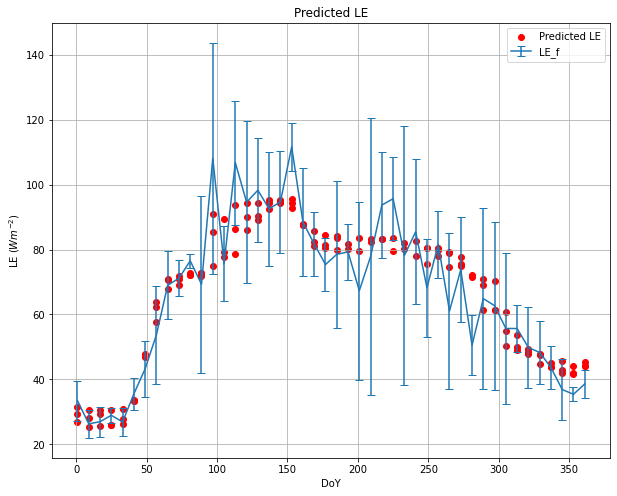

In [361]:
plt.figure(figsize = (10,8))
plt.errorbar(doy_LE.doy,doy_LE.LE_f_mean,yerr = doy_LE.LE_f_std,capsize = 4, label = 'LE_f')
plt.scatter(df.doy, y = rf.predict(x),color = 'r', label = 'Predicted LE')
plt.grid(True)
plt.title('Predicted LE')
plt.xlabel('DoY')
plt.ylabel('LE $(W m^{-2})$')
plt.legend()
plt.savefig("F:\graph\error_rf.png", dpi = 300)
plt.show()

In [362]:
df

date  doy  month  year        LE  LE(w/m^2)       LE_f     sta_LE
0   2016-01-01    1      1  2016  4.280934  49.547846  26.687340  49.649160
1   2016-01-09    9      1  2016  3.983942  46.110440  21.407801  45.187856
2   2016-01-17   17      1  2016  4.184614  48.433035  22.367472  47.331518
3   2016-01-25   25      1  2016  4.097034  47.419369  29.080107  46.251262
4   2016-02-02   33      2  2016  4.216757  48.805061  29.018260  49.860042
..         ...  ...    ...   ...       ...        ...        ...        ...
126 2018-11-25  329     11  2018  5.500724  63.665785  42.409859  61.936497
127 2018-12-03  337     12  2018  4.852996  56.168939  38.483083  54.382695
128 2018-12-11  345     12  2018  4.400318  50.929603  31.551020  49.007732
129 2018-12-19  353     12  2018  4.686077  54.236998  33.448103  53.322883
130 2018-12-27  361     12  2018  4.289179  49.643274  34.669277  47.794335

[131 rows x 8 columns]

In [363]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth = 3)
tree_reg1.fit(x_train,y_train)

print('rmse={} and r2 score={} on train set'.
      format(mean_squared_error(y_train,tree_reg1.predict(x_train), squared = False),
             r2_score(y_train,tree_reg1.predict(x_train))))
print('rmse={} and r2 score={} on test set'.
      format(mean_squared_error(y_test,tree_reg1.predict(x_test))**0.5,
             r2_score(y_test,tree_reg1.predict(x_test))))
print('rmse={} and r2 score={} on entier set'.
      format(mean_squared_error(y,tree_reg1.predict(x))**0.5,
             r2_score(y,tree_reg1.predict(x))))

px.scatter(x= df.date, y = [df.LE_f,tree_reg1.predict(x)])
px.scatter(x_test.doy,[y_test,tree_reg1.predict(x_test)])

rmse=16.398171749660694 and r2 score=0.6623493370719193 on train set
rmse=17.326245700636512 and r2 score=0.5330203375503428 on test set
rmse=16.687028135126443 and r2 score=0.6290804916312294 on entier set


In [364]:
y2 = y_train - tree_reg1.predict(x_train)
tree_reg2 = DecisionTreeRegressor(max_depth = 3)
tree_reg2.fit(x_train,y2)
prediction = sum(tree_reg.predict(x) for tree_reg in(tree_reg1,tree_reg2))

p_train = sum(tree_reg.predict(x_train) for tree_reg in(tree_reg1,tree_reg2))
print('rmse={} and r2 score={} on train set'.
      format(mean_squared_error(y_train,p_train, squared = False),
             r2_score(y_train,p_train)))
p_test = sum(tree_reg.predict(x_test) for tree_reg in(tree_reg1,tree_reg2))
print('rmse={} and r2 score={} on test set'.
      format(mean_squared_error(y_test,p_test)**0.5,
             r2_score(y_test,p_test)))
print('rmse={} and r2 score={} on entier set'.
      format(mean_squared_error(y,prediction)**0.5,
             r2_score(y,prediction)))
px.scatter(x = df.date, y = [df.LE_f,prediction])

rmse=13.920157890147559 and r2 score=0.7566871376627744 on train set
rmse=16.587977125952786 and r2 score=0.5719683482997653 on test set
rmse=14.78589740019967 and r2 score=0.7087827773405099 on entier set


In [365]:
y3 = y2 - tree_reg2.predict(x_train)
tree_reg3 = DecisionTreeRegressor(max_depth = 3)
tree_reg3.fit(x_train,y3)
prediction = sum(tree_reg.predict(x) for tree_reg in (tree_reg1,tree_reg2,tree_reg3))

p_train = sum(tree_reg.predict(x_train) for tree_reg in(tree_reg1,tree_reg2,tree_reg3))
print('rmse={} and r2 score={} on train set'.
      format(mean_squared_error(y_train,p_train)**0.5,
             r2_score(y_train,p_train)))
p_test = sum(tree_reg.predict(x_test) for tree_reg in(tree_reg1,tree_reg2,tree_reg3))
print('rmse={} and r2 score={} on test set'.
      format(mean_squared_error(y_test,p_test)**0.5,
             r2_score(y_test,p_test)))
print('rmse={} and r2 score={} on entier set'.
      format(mean_squared_error(y,prediction)**0.5,
             r2_score(y,prediction)))

px.scatter(x = df.date,y = [df.LE_f,prediction])

rmse=12.608758652199256 and r2 score=0.800372021541978 on train set
rmse=17.959847565513787 and r2 score=0.4982419811344062 on test set
rmse=14.454323240659356 and r2 score=0.721697438079196 on entier set


# XGBOOST model

In [366]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100)
gbrt.fit(x_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(x_test)]
bst_n_estimators = np.argmin(errors) + 1
print('best n_estimators:',bst_n_estimators)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(x_train, y_train)

print('rmse={} and r2 score={} on train set'.
      format(mean_squared_error(y_train,gbrt_best.predict(x_train))**0.5,
             r2_score(y_train,gbrt_best.predict(x_train))))
print('rmse={} and r2 score={} on test set'.
      format(mean_squared_error(y_test,gbrt_best.predict(x_test))**0.5,
             r2_score(y_test,gbrt_best.predict(x_test))))
print('rmse={} and r2 score={} on entier set'.
      format(mean_squared_error(y,gbrt_best.predict(x))**0.5,
             r2_score(y,gbrt_best.predict(x))))

px.scatter(x = df.date, y = [df.LE_f,gbrt_best.predict(x)])
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.date, y = df.LE_f, mode = 'markers', name = 'Flux tower_LE'))
fig.add_trace(go.Scatter(x = df.date, y = gbrt_best.predict(x), mode = 'markers', name = 'Predicted LE'))
fig.add_trace(go.Scatter(x = df.date, y = df['LE(w/m^2)'], mode = 'markers', name = 'MODIS_LE'))
fig.update_layout(title = 'predicted LE by XGBOOST model',
                 xaxis_title = 'Date',
                 yaxis_title = '$\\text{LE (W}m^{-2})$')

best n_estimators: 42
rmse=13.255107208058456 and r2 score=0.7793808360106013 on train set
rmse=15.43745669117584 and r2 score=0.6292846800215472 on test set
rmse=13.957708387533224 and r2 score=0.7404924962059342 on entier set


In [308]:
params = {'max_depth':[2,3,4,5], 'n_estimators':[10,20,30,40]}
gridSearch = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = params,cv = 3, scoring = 'neg_root_mean_squared_error')
gridSearch.fit(x_train,y_train)
gridSearch.best_params_, gridSearch.best_score_

NameError: name 'GridSearchCV' is not defined

In [309]:
px.scatter(x = gbrt_best.predict(x), y = y)

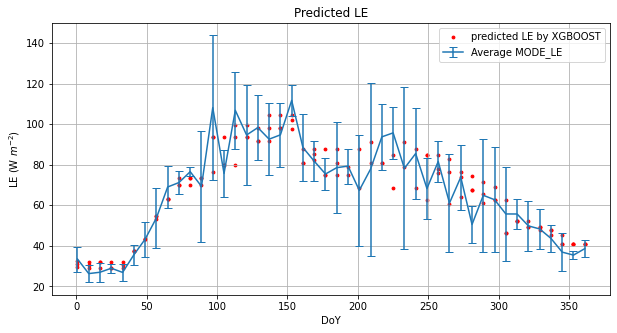

In [367]:
plt.figure(figsize = (10,5))
plt.errorbar(doy_LE.doy,doy_LE.LE_f_mean,yerr = doy_LE.LE_f_std,capsize = 4, label = 'Average MODE_LE ')
plt.scatter(df.doy, y = gbrt_best.predict(x),color = 'r', s = 8, label = 'predicted LE by XGBOOST')
plt.grid(True)
plt.title('Predicted LE')
plt.xlabel('DoY')
plt.ylabel('LE (W $m^{-2}$)')
plt.legend()
plt.savefig('F:\graph\Errorbar_xgboost.png', dpi=300)
plt.show()

In [368]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.LE, y = gbrt_best.predict(x), mode = 'markers', name = 'Predicted LE' ))
fig.add_trace(go.Scatter(x = df.LE, y = df.LE_f,mode = 'markers', name = '(MODI_LE, flux tower_LE)'))
fig.update_layout(title = 'Predcted LE by XGBOOST model',
                 xaxis_title = '$\\text{MODI_LE (W}m^-2)$',
                 yaxis_title = '$\\text{Flux_tower_LE (W}m^-2)$')
fig.show()

In [369]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.doy, y = df.LE_f, mode = 'markers', name = 'Flux tower LE'))
fig.add_trace(go.Scatter(x = df.doy, y = gbrt_best.predict(x), mode = 'markers', name = 'Predicted LE'))
#fig.add_trace(go.Scatter(x = df.DoY, y = df.LE, mode = 'markers', name = 'MODI LE'))
fig.update_layout(title = 'Predicted LE vs Flux tower_LE on DoY',
                 xaxis_title = 'DoY',
                 yaxis_title = '$\\text{LE (W}m^{-2})$')
fig.show()

In [370]:
px.scatter(df, x = 'doy', y = ['LE_f','LE(w/m^2)',gbrt_best.predict(x)], title = 'LE measured by Flux tower')

In [371]:
px.scatter(df, x = 'date', y = 'LE(w/m^2)', title = 'LE measured by MODI')

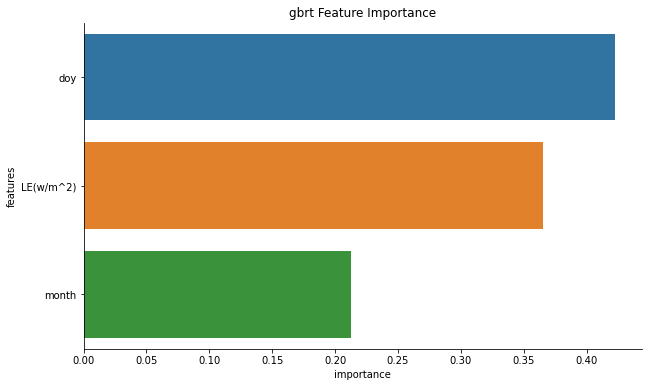

In [372]:
plot_importance(x_train.columns,gbrt_best.feature_importances_,'gbrt' )

In [373]:
gbrt_best.feature_importances_

array([0.42252505, 0.21226378, 0.36521116])

In [374]:
modis_LE = pd.read_csv('F:\knp big area\\MODIS_LE.csv')
modis_LE

Unnamed: 0        date        LE  LE(w/m^2)
0              0  2000-01-01  3.056256  35.373339
1              1  2000-01-09  3.385569  39.184825
2              2  2000-01-17  3.541777  40.992794
3              3  2000-01-25  3.589613  41.546452
4              4  2000-02-02  3.775802  43.701416
...          ...         ...       ...        ...
1007        1007  2021-11-25  5.718218  66.183077
1008        1008  2021-12-03  5.343989  61.851729
1009        1009  2021-12-11  4.746983  54.941933
1010        1010  2021-12-19  4.549563  52.656973
1011        1011  2021-12-27  4.358848  50.449625

[1012 rows x 4 columns]

In [375]:
modis_LE.drop('Unnamed: 0', axis = 1, inplace= True)
modis_LE['month'] = pd.to_datetime(modis_LE['date']).dt.month
modis_LE['doy'] = pd.to_datetime(modis_LE['date']).dt.day_of_year
modis_LE

date        LE  LE(w/m^2)  month  doy
0     2000-01-01  3.056256  35.373339      1    1
1     2000-01-09  3.385569  39.184825      1    9
2     2000-01-17  3.541777  40.992794      1   17
3     2000-01-25  3.589613  41.546452      1   25
4     2000-02-02  3.775802  43.701416      2   33
...          ...       ...        ...    ...  ...
1007  2021-11-25  5.718218  66.183077     11  329
1008  2021-12-03  5.343989  61.851729     12  337
1009  2021-12-11  4.746983  54.941933     12  345
1010  2021-12-19  4.549563  52.656973     12  353
1011  2021-12-27  4.358848  50.449625     12  361

[1012 rows x 5 columns]

In [376]:
input_df = modis_LE[['doy','month','LE(w/m^2)']]
input_df

doy  month  LE(w/m^2)
0       1      1  35.373339
1       9      1  39.184825
2      17      1  40.992794
3      25      1  41.546452
4      33      2  43.701416
...   ...    ...        ...
1007  329     11  66.183077
1008  337     12  61.851729
1009  345     12  54.941933
1010  353     12  52.656973
1011  361     12  50.449625

[1012 rows x 3 columns]

In [410]:
predicted_LE = gbrt_best.predict(input_df)

In [412]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = modis_LE.date, y = modis_LE['LE(w/m^2)'],mode = 'markers+lines',marker_size = 5, name = 'MODIS_LE'))
fig.add_trace(go.Scatter(x = modis_LE.date, y = predicted_LE,mode = 'markers+lines',marker_size = 5, name = 'predicted LE'))
fig.add_trace(go.Scatter(x = df.date, y = df.LE_f,mode = 'markers+lines',marker_size = 5, name = 'f_LE'))
fig.add_trace(go.Scatter(x = p_df.date, y = p_df['pred_LE'],mode = 'markers+lines',marker_size = 5, name = 'lib_reg_LE'))
fig.add_trace(go.Scatter(x = season_mod_pred.date, y = season_mod_pred['pred_LE'],mode = 'markers+lines',marker_size = 5, name = 'season_model_pred'))
fig.update_layout(title = 'predicted LE from year 2000 to 2021', xaxis_title = 'date', yaxis_title = 'LE$(W m^{-2})$')
fig.show()

In [379]:
pred_LE_df = pd.DataFrame({'date':modis_LE['date'],'pred_LE':predicted_LE})
pred_LE_df

date    pred_LE
0     2000-01-01  29.398537
1     2000-01-09  28.894184
2     2000-01-17  28.894184
3     2000-01-25  28.894184
4     2000-02-02  28.894184
...          ...        ...
1007  2021-11-25  49.095220
1008  2021-12-03  47.645199
1009  2021-12-11  40.961405
1010  2021-12-19  40.961405
1011  2021-12-27  40.961405

[1012 rows x 2 columns]

In [262]:
pred_LE_df.to_csv('gbr_pred_LE_df.csv')

In [249]:
os.getcwd()

'F:\\knp big area'